<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_06_CNN%EA%B8%B0%EC%B4%88_Convolutional_Layer_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.06 CNN기초 - Convolutional Layer
---

* 날짜: 2022-07-04
* 이름: 김민규

## 학습내용
    - CNN의 개념을 이해한다.
    - 텐서플로우를 이용해 CNN을 구성한다.
    - CNN 모델을 이용해 손글씨 이미지를 분류한다.
    - CNN의 feature map에 대해 이해한다.

## 데이터셋

* MNIST

```
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 이미지 데이터의 특징
---

<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv1.png width=550>
</p>

다층 퍼셉트론을 이용하기 위해서는 데이터 샘플 한개의 차원이 1차원이여야 합니다. 그러나 1차원으로 변환된 결과는 사람이 보기에도 이게 원래 어떤 이미지였는지 알아보기가 어렵습니다. 

위와 같은 결과는 변환 전에 가지고 있던 **공간적인 구조**(spatial structure) 정보가 유실된 상태입니다.

결국 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고, 이를 위해 합성곱 신경망을 사용합니다.


```
X = np.array([[1,1,1,1,1],
              [1,0,1,0,1],
              [1,1,0,0,1],
              [1,1,1,0,1],
              [1,1,1,0,1],
              [1,1,1,1,1],])
```

(6, 5)
(1, 30)


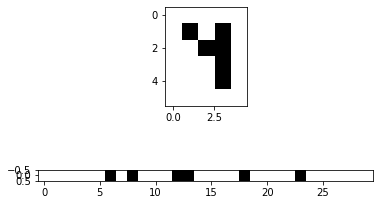

In [2]:
X = np.array([[1,1,1,1,1],
              [1,0,1,0,1],
              [1,1,0,0,1],
              [1,1,1,0,1],
              [1,1,1,0,1],
              [1,1,1,1,1],])
X_flatten = X.flatten().reshape(1,30)
print(X.shape)
print(X_flatten.shape)
plt.imshow(X, cmap='gray')

plt.subplot(211);plt.imshow(X, cmap='gray')
plt.subplot(212);plt.imshow(X_flatten, cmap='gray') # (30, ) -> (1,30)

## 합성곱 층
---

### | 텐서플로우를 이용한 합성곱층 구현

```
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    padding='valid',
    strides=(1, 1),
    activation=None,
)

```

In [3]:
from tensorflow.keras.layers import Conv2D
#from tensorflow.keras import layers

#### **filters**

* filter 개수에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-01.PNG?raw=true
 width=450>
</p>


In [4]:
x = np.random.normal(0,1, size=(1, 8,8, 1)) # resolution = (8,8), ch=(1)
print(x.shape)
for n in[1,2,3,4]:
    y = Conv2D(filters = n, kernel_size=(2,2))(x)
    print(f'필터 개수가 {n}일 때 아웃풋의 shape: {y.shape}')
# 필터 개수에 따라 아웃풋의 채널 (dimension)이 변화

(1, 8, 8, 1)
필터 개수가 1일 때 아웃풋의 shape: (1, 7, 7, 1)
필터 개수가 2일 때 아웃풋의 shape: (1, 7, 7, 2)
필터 개수가 3일 때 아웃풋의 shape: (1, 7, 7, 3)
필터 개수가 4일 때 아웃풋의 shape: (1, 7, 7, 4)


#### **kernel size**

* kernel size 에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-02.PNG?raw=true
 width=450>
</p>

In [5]:
x = np.random.normal(0,1, size=(1, 4,4, 1)) # resolution = (4,4), ch=(1)
print(x.shape)
for n in[1,2,3,4]:
    y = Conv2D(filters = 1, kernel_size=n)(x)
    print(f'커널 사이즈가 {n}일 때 아웃풋의 shape: {y.shape}')
# 필터 개수에 따라 아웃풋의 채널 (dimension)이 변화
# 커널 사이즈에 따라 아웃풋의 resolution이 변화합니다(4-n+1).

(1, 4, 4, 1)
커널 사이즈가 1일 때 아웃풋의 shape: (1, 4, 4, 1)
커널 사이즈가 2일 때 아웃풋의 shape: (1, 3, 3, 1)
커널 사이즈가 3일 때 아웃풋의 shape: (1, 2, 2, 1)
커널 사이즈가 4일 때 아웃풋의 shape: (1, 1, 1, 1)


#### **padding**

* padding 옵션에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.
  * valid
  * same

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-03.PNG?raw=true
 width=550>
</p>

In [6]:
x = np.random.normal(0,1, size=(1, 4,4, 1)) # resolution = (4,4), ch=(1)
print(x.shape)
for n in[1,2,3,4]:
    for padding in ['valid', 'same']:
        y = Conv2D(filters = 1, kernel_size=n, padding=padding)(x)
        print(f'커널 사이즈가 {n}이고, 패딩이 {padding}일 때, 아웃풋의 shape: {y.shape}')

# padding = same이면 커널 사이즈에 따른 아웃풋 변화가 없습니다.
# 대게의 경우 패딩을 = 'same' -> 커널 사이즈가 아웃풋 크기 고려 안함

(1, 4, 4, 1)
커널 사이즈가 1이고, 패딩이 valid일 때, 아웃풋의 shape: (1, 4, 4, 1)
커널 사이즈가 1이고, 패딩이 same일 때, 아웃풋의 shape: (1, 4, 4, 1)
커널 사이즈가 2이고, 패딩이 valid일 때, 아웃풋의 shape: (1, 3, 3, 1)
커널 사이즈가 2이고, 패딩이 same일 때, 아웃풋의 shape: (1, 4, 4, 1)
커널 사이즈가 3이고, 패딩이 valid일 때, 아웃풋의 shape: (1, 2, 2, 1)
커널 사이즈가 3이고, 패딩이 same일 때, 아웃풋의 shape: (1, 4, 4, 1)
커널 사이즈가 4이고, 패딩이 valid일 때, 아웃풋의 shape: (1, 1, 1, 1)
커널 사이즈가 4이고, 패딩이 same일 때, 아웃풋의 shape: (1, 4, 4, 1)


#### **strides**
* strides 의 크기에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-04.PNG?raw=true
 width=450>
</p>

In [7]:
x = np.random.normal(0,1, size=(1, 24,24, 1)) # resolution = (24,24), ch=(1)
print(x.shape)
for n in[1,2,3,4,6]: # 보통 1 또는 2정도.. 크게 사용하지는 않습니다.
    y = Conv2D(filters = 1, kernel_size=3, padding='same', strides=n)(x)
    print(f'커널 사이즈가 {n}일 때 아웃풋의 shape: {y.shape}')
# 스트라이드에 따라 아웃풋의 resolution이 변화 (resolution/n)

(1, 24, 24, 1)
커널 사이즈가 1일 때 아웃풋의 shape: (1, 24, 24, 1)
커널 사이즈가 2일 때 아웃풋의 shape: (1, 12, 12, 1)
커널 사이즈가 3일 때 아웃풋의 shape: (1, 8, 8, 1)
커널 사이즈가 4일 때 아웃풋의 shape: (1, 6, 6, 1)
커널 사이즈가 6일 때 아웃풋의 shape: (1, 4, 4, 1)


## CNN 실습: MNIST 손글씨 이미지 분류
---

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

### **| CNN 모델을 이용한 분류**

####  **데이터 준비**

In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 전처리-정규화
x_train = x_train/255.0
x_test = x_test/255.0
# 전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


#### **모델 구성**
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-05_2.PNG?raw=true
 width=650>
</p>

In [11]:
from tensorflow.keras import models, layers, utils

def build_model():
    x = layers.Input(shape=(28,28,1))
    #  * 모든 conv 레이어의 padding = 'same'
    
    # conv1
    y = layers.Conv2D(8, kernel_size=3 ,padding='same', activation='relu')(x)
    # conv2
    y = layers.Conv2D(8, kernel_size=3 ,padding='same', activation='relu',
                      strides=2)(y)
    # conv3
    y = layers.Conv2D(3, kernel_size=3 ,padding='same', activation='relu',
                      strides=2)(y)
    # flatten
    y = layers.Flatten()(y)
    y = layers.Dense(10, activation='softmax')(y) # softmax를 사용합니다.
    # dense
    model = models.Model(x,y)
    return model

#### **학습 및 평가**

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 8)         584       
                                                                 
 conv2d_29 (Conv2D)          (None, 7, 7, 3)           219       
                                                                 
 flatten_2 (Flatten)         (None, 147)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1480      
                                                                 
Total params: 2,363
Trainable params: 2,363
Non-trainable p

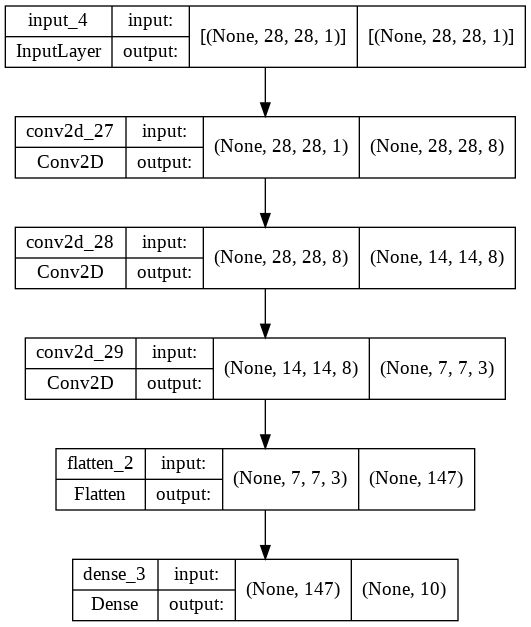

In [14]:
model = build_model()
model.summary()
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
print('===테스트 스코어')
model.evaluate(x_test,y_test)
# 시각화
utils.plot_model(model, show_shapes=True)

### **| Feature map**

#### **feature map 얻기**

In [21]:
# for layer in model.layers:
#     print(layer, layer.output)
layer_outputs = [layer.output for layer in model.layers] # 레이어의 아웃풋 = 데이터 변환과정
model_output_by_layer = models.Model(inputs=model.input, outputs=layer_outputs) # 모든 레이어의 아웃풋 획득 가능
print(len(layer_outputs))
x_pred_maps = model_output_by_layer(x_test)
for x_pred_map in x_pred_maps:
    print(x_pred_map.shape)
cnn_layers = [1,2,3]
dnn_layers = [4,5]

6
(10000, 28, 28, 1)
(10000, 28, 28, 8)
(10000, 14, 14, 8)
(10000, 7, 7, 3)
(10000, 147)
(10000, 10)


#### **시각화**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-05_2.PNG?raw=true
 width=650>
</p>

[시각화 함수 스크립트](https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/scripts/featuremap_dict.py)

1 번째 Convolutional 레이어 (28, 28, 8)


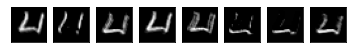

2 번째 Convolutional 레이어 (14, 14, 8)


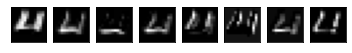

3 번째 Convolutional 레이어 (7, 7, 3)


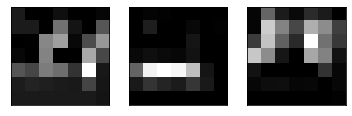

4 번째 Dense 레이어 (147,)


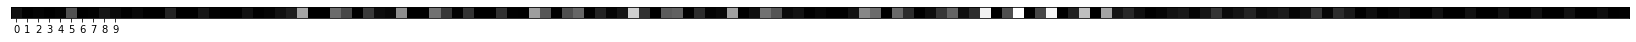

5 번째 Dense 레이어 (10,)


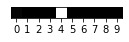

In [28]:
sample_idx = 33
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)

In [22]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

def show_featuremap(sample_idx, fmaps, cnn_idxs, flatten_idxs):
  for idx in cnn_idxs:
    fmap = fmaps[idx][sample_idx]
    chs = fmap.shape[2]
    print(f'{idx} 번째 Convolutional 레이어 {fmap.shape}')
    for ch in range(chs):
      plt.subplot(1,chs,ch+1)
      plt.imshow(fmap[:,:,ch], cmap='gray')
      plt.xticks([]);plt.yticks([])
    plt.show()

  for idx in flatten_idxs:
    fmap = fmaps[idx][sample_idx]
    print(f'{idx} 번째 Dense 레이어 {fmap.shape}')
    plt.figure(figsize=(int(len(fmap)/5),10))
    plt.imshow(tf.reshape(fmap,(1,len(fmap))), cmap='gray')
    plt.xticks(range(10));plt.yticks([]);plt.show()